# Test of the focusedBeam class   
Aug. 2025

## Description
In this notebook, the method for defining cylindrically symmetric LaguerreGaussian (LG) beams of various orders, focused with an aplanatic lens, is shown. The beams have a well-defined helicity which is preserved under focusing.

## Initialization

As described in the documentation, a focused Laguerre-Gassian (LG) beam depends on a number of parameters that affect the angular momentum, shape, size, and multipolar content of the beam.    
Below is an example of how to create such an object, using a pre-defined domain. 
Beam parameters such as wavelength, helicity, order of the LG beam, and numerical aperture (NA) of the lens are defined. 
   
The maxJ argument allows the user to define the maximum order multipole to include. This allows a user to modify the sums as they wish, but also creates a danger of not including the sufficient number of terms in the expansion.

In [2]:
from src.focusedBeam import *

In [3]:
#initialize domain
size = 3
points = 150
planes = {'xy', 'yz'}
d = domain(size, points, planes)

# focused beam parameters
maxJ = 25 # maximum order
wavelength = 0.632 #µm
p = 1 # helicity
l = 2 # LG order (0 = Gaussian)
NA = 0.9 # NA of aplanatic lens

# create focused beam object
foc = focusedBeam(maxJ = maxJ, wavelength = wavelength, domain = d, p = p, l = l, NA = NA)

## Multipolar content

A focused beam is a weighted sum of multipoles of magnetic and electric parity. It is often useful to see the distribution of the multipolar content within a certian beam, e.g. to predict interactions with scatterers.   
For a defined focusedBeam object, its multipolar distribution can be visualized by using the 'plotBeamCoeffs()' method.

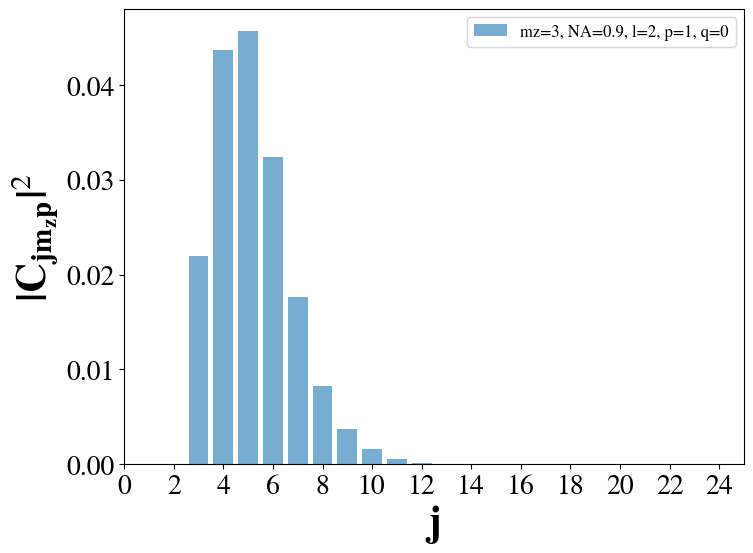

In [4]:
# display multipole content
foc.plotBeamCoeffs()

To compare with other focused beams, one can also include other beam parameters:

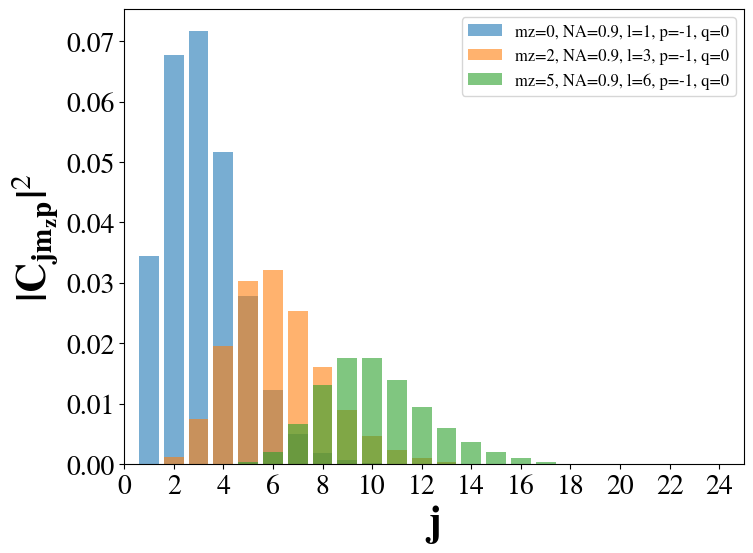

In [5]:
# display multipole content for other beam types
foc.plotBeamCoeffs(p = [-1], l = [1,3,6])

To create custom plots of the distribution, or to use the data elsewhere, the beam coefficients can be extracted using the 'beamCoeffs()' method, which returns two supplementary values.   
The beam coefficients, C, are complex numbers. The first entry in the array corresponds to order $j=0$, which is always zero. The first non-zero element is at index $j=m_z+l$

In [6]:
C, lensInt, suma = foc.beamCoeffs()
C

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, -2.63881138e-02-1.45882166e-01j,
       -3.72162301e-02-2.05743551e-01j, -3.80732396e-02-2.10481382e-01j,
       -3.20381666e-02-1.77117515e-01j, -2.36314882e-02-1.30642634e-01j,
       -1.61920058e-02-8.95147295e-02j, -1.08078992e-02-5.97496191e-02j,
       -7.02253713e-03-3.88228933e-02j, -4.15650952e-03-2.29785507e-02j,
       -2.03057291e-03-1.12256744e-02j, -7.86630561e-04-4.34875228e-03j,
       -3.76572919e-04-2.08181886e-03j, -3.92936911e-04-2.17228439e-03j,
       -3.67391320e-04-2.03105996e-03j, -1.38031774e-04-7.63085014e-04j,
        1.16742579e-04+6.45391346e-04j,  1.68977391e-04+9.34162556e-04j,
        1.45834276e-05+8.06219810e-05j, -1.42460224e-04-7.87566940e-04j,
       -1.29050364e-04-7.13432826e-04j,  2.06333440e-05+1.14067907e-04j,
        1.29837130e-04+7.17782324e-04j,  8.60710314e-05+4.75828950e-04j])

## Beam visualization   
In the planes supported by the domain object, the focusedBeam can be plotted to show its shape - either in polarization components or the total field intensity.   
This is done by using the 'plotBeam()' method on a focusedBeam object. 

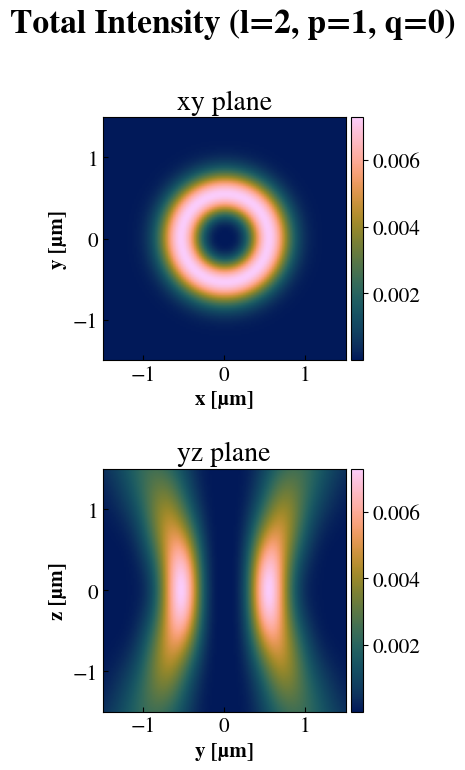

In [7]:
# plot the beam
foc.plotBeam(plot="total")

To see the polarization components, use 'plot = "components"' argument:

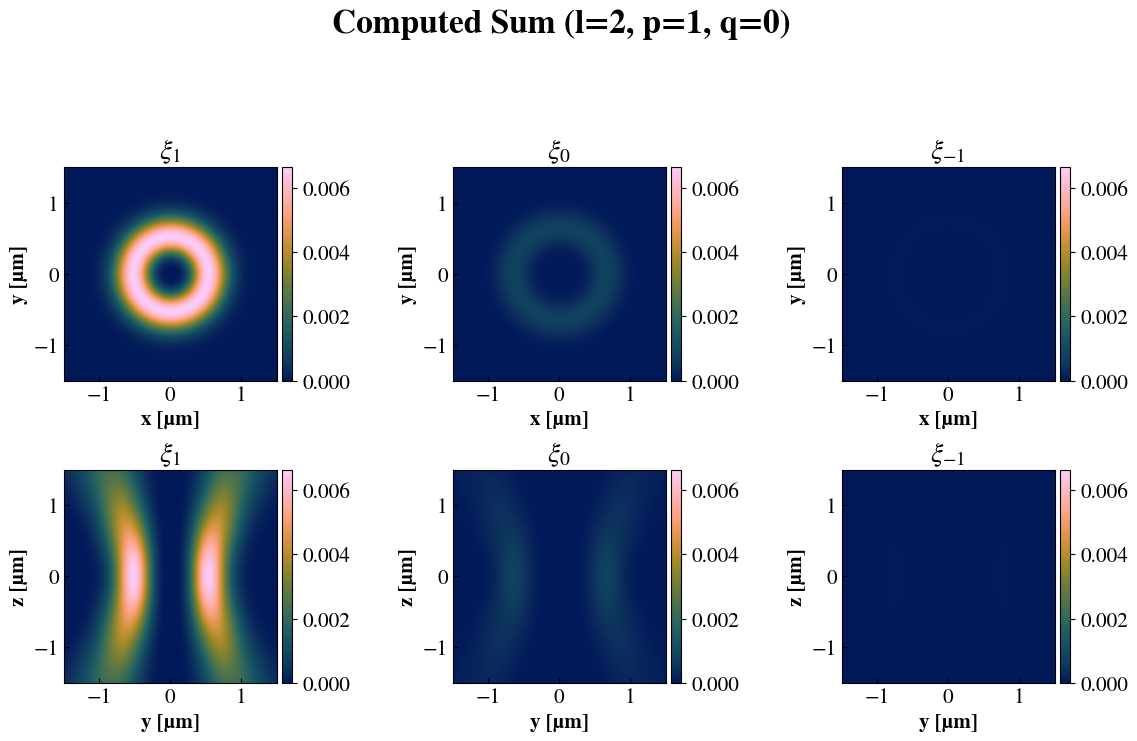

In [8]:
# plot a beam with new parameters, using the same object

foc.plotBeam(plot="components", globalnorm=True) 

Since we have defined a beam with helicity 1, the majority of the intensity is in the left circular polarized component. A tiny bit, however, has been transferred to the z polarization since the aplanatic lens is not polarization preserving.

## Higher orders
When using focused LG beams of higher orders, make sure to verify the 'maxJ' argument to ensure physical results. Higher order beams require more multipolar components. The same is true for less focused beams. For instance, below I define a focused beam of order $l=6$ focused with a lens of $NA=0.3$, using up to 60 multipoles.

In [9]:
#initialize a larger domain since the beam is wider
size = 10
points = 150
planes = {'xy', 'yz'}
d = domain(size, points, planes)

foc_1 = focusedBeam(maxJ=60, wavelength = 0.632, domain=d, p=1, l=6, NA=0.3)

Let's visualize the distribution

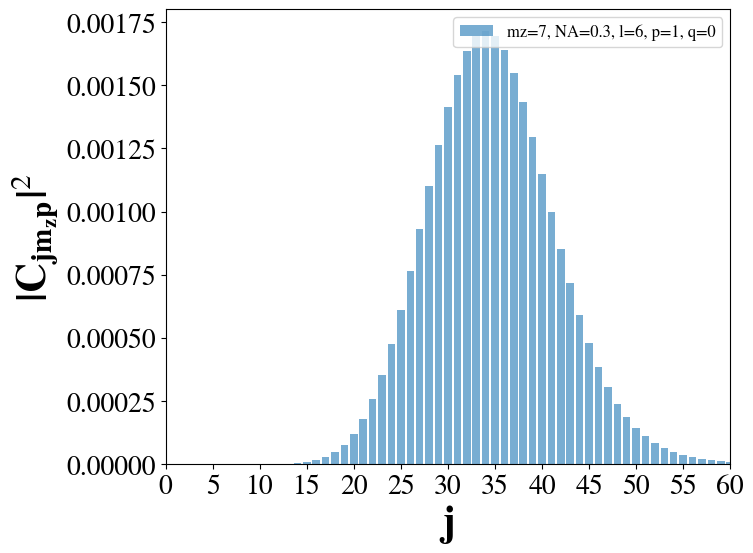

In [10]:
foc_1.plotBeamCoeffs()

Plotting the beam takes time, since there are many multipoles to include.

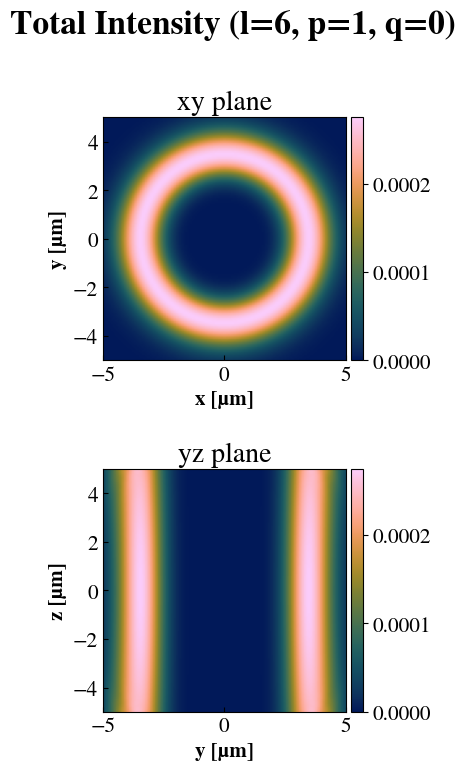

In [11]:
foc_1.plotBeam(plot="total")